In [1]:
from ucimlrepo import fetch_ucirepo 

In [2]:
import sys
# print(sys.path)
sys.path.append('c:\\Users\\nourh\\Documents\\Projets\\advanced_ml\\Kernel-approximation\\src')

In [6]:

# fetch Xset 
letter_recognition = fetch_ucirepo(id=59) 
# X (as pandas Xframes) 
X = letter_recognition.data.features 
y = letter_recognition.data.targets 
  
# metaX 
print(letter_recognition.metaX) 
  
# variable information 
print(letter_recognition.variables) 



None
     name     role         type demographic                    description  \
0   lettr   Target  Categorical        None                 capital letter   
1   x-box  Feature      Integer        None     horizontal position of box   
2   y-box  Feature      Integer        None       vertical position of box   
3   width  Feature      Integer        None                   width of box   
4    high  Feature      Integer        None                  height of box   
5   onpix  Feature      Integer        None              total # on pixels   
6   x-bar  Feature      Integer        None     mean x of on pixels in box   
7   y-bar  Feature      Integer        None     mean y of on pixels in box   
8   x2bar  Feature      Integer        None                mean x variance   
9   y2bar  Feature      Integer        None                mean y variance   
10  xybar  Feature      Integer        None           mean x y correlation   
11  x2ybr  Feature      Integer        None              me

### Exploring the dataset


In [7]:
print(X.head())


   x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  x2ybr  \
0      2      8      3     5      1      8     13      0      6      6     10   
1      5     12      3     7      2     10      5      5      4     13      3   
2      4     11      6     8      6     10      6      2      6     10      3   
3      7     11      6     6      3      5      9      4      6      4      4   
4      2      1      3     1      1      8      6      6      6      6      5   

   xy2br  x-ege  xegvy  y-ege  yegvx  
0      8      0      8      0      8  
1      9      2      8      4     10  
2      7      3      7      3      9  
3     10      6     10      2      8  
4      9      1      7      5     10  


In [9]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x-box   20000 non-null  int64
 1   y-box   20000 non-null  int64
 2   width   20000 non-null  int64
 3   high    20000 non-null  int64
 4   onpix   20000 non-null  int64
 5   x-bar   20000 non-null  int64
 6   y-bar   20000 non-null  int64
 7   x2bar   20000 non-null  int64
 8   y2bar   20000 non-null  int64
 9   xybar   20000 non-null  int64
 10  x2ybr   20000 non-null  int64
 11  xy2br   20000 non-null  int64
 12  x-ege   20000 non-null  int64
 13  xegvy   20000 non-null  int64
 14  y-ege   20000 non-null  int64
 15  yegvx   20000 non-null  int64
dtypes: int64(16)
memory usage: 2.4 MB
None


In [10]:

print(X.describe())


              x-box         y-box         width         high         onpix  \
count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
mean       4.023550      7.035500      5.121850      5.37245      3.505850   
std        1.913212      3.304555      2.014573      2.26139      2.190458   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        3.000000      5.000000      4.000000      4.00000      2.000000   
50%        4.000000      7.000000      5.000000      6.00000      3.000000   
75%        5.000000      9.000000      6.000000      7.00000      5.000000   
max       15.000000     15.000000     15.000000     15.00000     15.000000   

              x-bar         y-bar         x2bar         y2bar         xybar  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.897600      7.500450      4.628600      5.178650      8.282050   
std        2.026035      2.325354      2.699968      2.38082

In [11]:
# Vérifier les valeurs manquantes
print(X.isnull().sum())

x-box    0
y-box    0
width    0
high     0
onpix    0
x-bar    0
y-bar    0
x2bar    0
y2bar    0
xybar    0
x2ybr    0
xy2br    0
x-ege    0
xegvy    0
y-ege    0
yegvx    0
dtype: int64


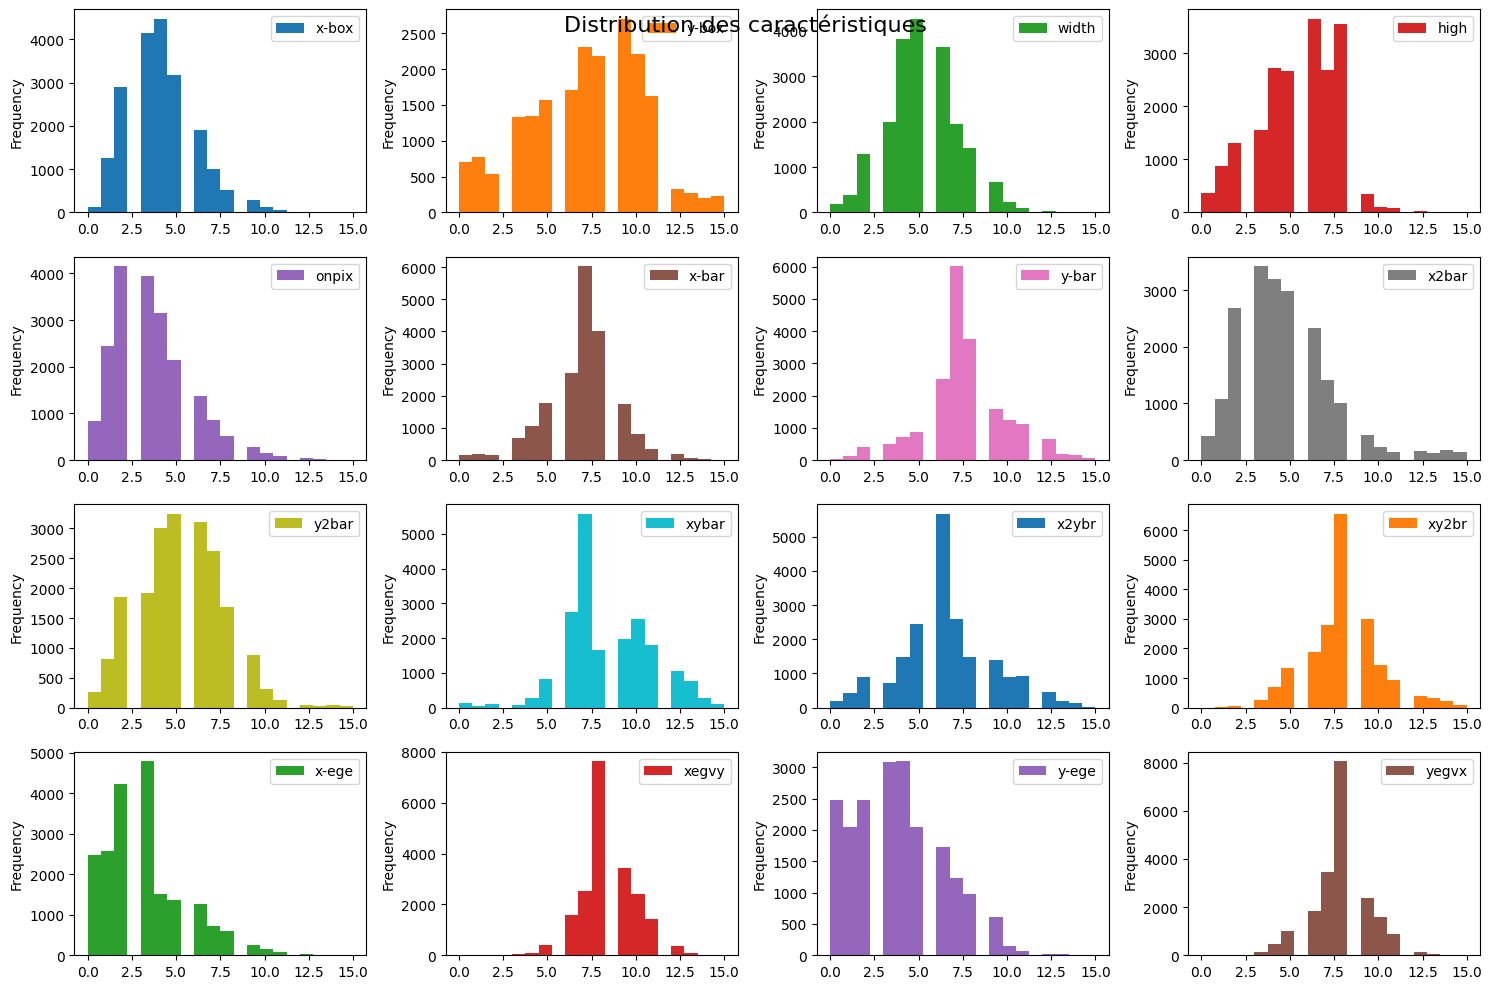

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tracer des histogrammes pour chaque caractéristique
X.plot(kind="hist", bins=20, figsize=(15, 10), layout=(4, 4), subplots=True, sharex=False)
plt.tight_layout()
plt.suptitle("Distribution des caractéristiques", fontsize=16)
plt.show()


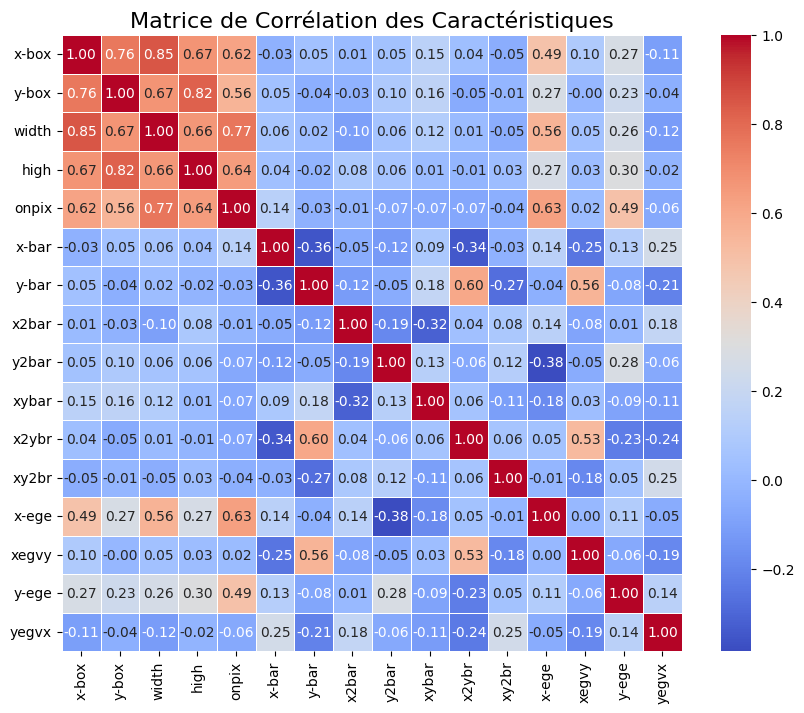

In [13]:
# Calculer la matrice de corrélation
corr_matrix = X.corr()

# Tracer la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de Corrélation des Caractéristiques", fontsize=16)
plt.show()


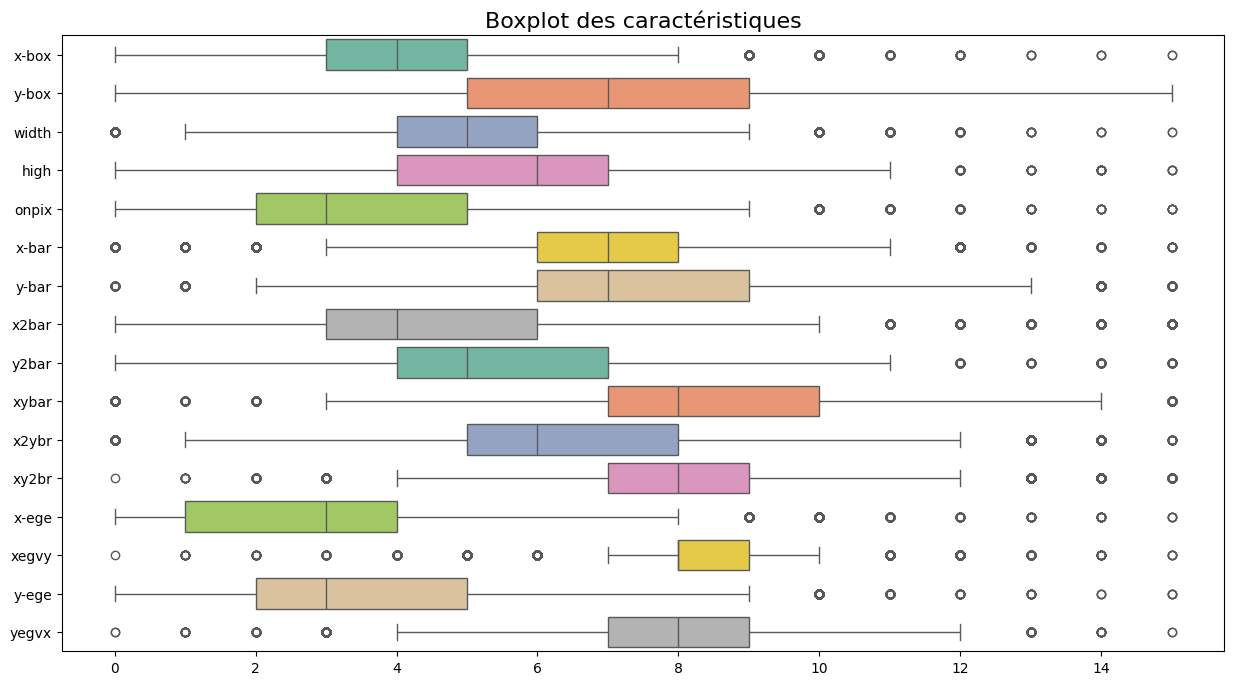

In [14]:
# Tracer des boxplots pour chaque caractéristique
plt.figure(figsize=(15, 8))
sns.boxplot(data=X, orient="h", palette="Set2")
plt.title("Boxplot des caractéristiques", fontsize=16)
plt.show()


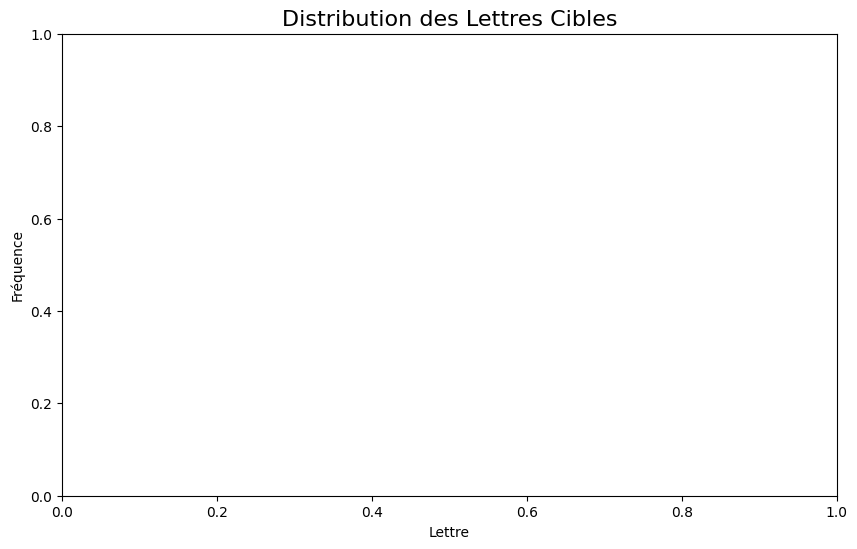

In [22]:
# Visualiser la distribution des lettres
plt.figure(figsize=(10, 6))
sns.countplot(x='letter', data=y, palette="Set3")
plt.title("Distribution des Lettres Cibles", fontsize=16)
plt.xlabel("Lettre")
plt.ylabel("Fréquence")
plt.show()


In [23]:
# Sélectionner les premières caractéristiques pour simplifier la visualisation
sns.pairplot(X[['x-box', 'y-box', 'width', 'height', 'on-surface']], hue="letter", palette="Set1")
plt.suptitle("Pairplot des Caractéristiques", fontsize=16)
plt.show()


KeyError: "['height', 'on-surface'] not in index"

In [ ]:
# Moyennes des caractéristiques par lettre
mean_values = X.groupby('letter').mean()

# Tracer les moyennes par lettre
plt.figure(figsize=(15, 8))
mean_values.plot(kind='bar', figsize=(15, 8))
plt.title("Moyennes des Caractéristiques par Lettre", fontsize=16)
plt.ylabel("Moyenne des Caractéristiques")
plt.xlabel("Lettre")
plt.show()

### Kernel approximation monitoring 

In [15]:
from approximations import RandomFourierFeatures, NystromApproximation
from tasks import KernelRidgeRegression

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [17]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [19]:
# Train an SVM with RBF kernel
svc = SVC(kernel='rbf',gamma=1, random_state=42)
svc.fit(X_train, y_train)

# Predict and evaluate
y_pred = svc.predict(X_test)
print("Accuracy with RBF Kernel:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


c:\Users\nourh\miniconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy with RBF Kernel: 0.51425
Classification Report:
               precision    recall  f1-score   support

           A       1.00      0.58      0.74       149
           B       1.00      0.50      0.67       153
           C       1.00      0.34      0.51       137
           D       1.00      0.51      0.67       156
           E       1.00      0.55      0.71       141
           F       0.98      0.66      0.79       140
           G       1.00      0.53      0.69       160
           H       0.98      0.35      0.52       144
           I       1.00      0.60      0.75       146
           J       0.98      0.40      0.57       149
           K       0.97      0.47      0.63       130
           L       1.00      0.44      0.61       155
           M       1.00      0.35      0.51       168
           N       1.00      0.42      0.60       151
           O       1.00      0.49      0.66       145
           P       0.08      0.99      0.15       173
           Q       0.99

In [20]:
from sklearn.kernel_approximation import RBFSampler

# Approximate RBF kernel with Random Fourier Features
rbf_sampler = RBFSampler(gamma=1, n_components=500, random_state=42)  # gamma corresponds to kernel's parameter
X_train_rff = rbf_sampler.fit_transform(X_train)
X_test_rff = rbf_sampler.transform(X_test)


In [21]:
# Train an SVM with the Random Fourier Features
svc_rff = SVC(kernel='linear', random_state=42)
svc_rff.fit(X_train_rff, y_train)

# Predict and evaluate
y_pred_rff = svc_rff.predict(X_test_rff)
print("Accuracy with Random Fourier Features:", accuracy_score(y_test, y_pred_rff))
print("Classification Report:\n", classification_report(y_test, y_pred_rff))


c:\Users\nourh\miniconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy with Random Fourier Features: 0.09775
Classification Report:
               precision    recall  f1-score   support

           A       0.05      0.07      0.05       149
           B       0.05      0.05      0.05       153
           C       0.04      0.04      0.04       137
           D       0.10      0.14      0.11       156
           E       0.05      0.06      0.05       141
           F       0.06      0.07      0.06       140
           G       0.07      0.07      0.07       160
           H       0.05      0.05      0.05       144
           I       0.38      0.38      0.38       146
           J       0.05      0.05      0.05       149
           K       0.06      0.07      0.06       130
           L       0.15      0.15      0.15       155
           M       0.13      0.12      0.12       168
           N       0.12      0.15      0.14       151
           O       0.09      0.08      0.08       145
           P       0.09      0.09      0.09       173
          

In [24]:
from sklearn.kernel_approximation import Nystroem

# Approximate RBF kernel with Nystrom method
nystroem = Nystroem(kernel='rbf', gamma=1, n_components=500, random_state=42)  # n_components determines the approximation level
X_train_nystroem = nystroem.fit_transform(X_train)
X_test_nystroem = nystroem.transform(X_test)


In [25]:
from memory_profiler import profile


In [26]:
# with our defined functions 

# Résultats pour différents approches
results = {}

# 2. SVM avec approximation Random Fourier Features
@profile
def train_svc_with_RFF_approximation(X_train, y_train):
    print("\nSVM avec approximation Random Fourier Features")
    rff = RandomFourierFeatures(n_components=500, gamma=1.0, kernel='rbf', random_state=42)
    X_train_rff = rff.fit_transform(X_train.to_numpy())
    X_test_rff = rff.transform(X_test.to_numpy())

    svm_rff = SVC(kernel='linear', C=1.0, random_state=42)
    svm_rff.fit(X_train_rff, y_train)
    y_pred_rff = svm_rff.predict(X_test_rff)
    results['Random Fourier Features'] = accuracy_score(y_test, y_pred_rff)
    print(classification_report(y_test, y_pred_rff))
    return results



In [27]:
# 3. SVM avec approximation Nystrom
@profile
def train_svc_with_nystrom_approximation(X_train, y_train):
    print("\nSVM avec approximation Nystrom")
    nystrom = NystromApproximation(n_components=1000, kernel='rbf', gamma=1.0, random_state=42)
    X_train_nystrom = nystrom.fit_transform(X_train.to_numpy())
    X_test_nystrom = nystrom.transform(X_test.to_numpy())

    svm_nystrom = SVC(kernel='linear', C=1.0, random_state=42)
    svm_nystrom.fit(X_train_nystrom, y_train)
    y_pred_nystrom = svm_nystrom.predict(X_test_nystrom)
    results['Nystrom Approximation'] = accuracy_score(y_test, y_pred_nystrom)
    print(classification_report(y_test, y_pred_nystrom))
    return results



In [29]:
%load_ext memory_profiler


In [34]:
%mprun -f train_svc_with_RFF_approximation train_svc_with_RFF_approximation(X_train, y_train)


ERROR: Could not find file C:\Users\nourh\AppData\Local\Temp\ipykernel_146876\138555623.py

SVM avec approximation Random Fourier Features


c:\Users\nourh\miniconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           A       0.06      0.08      0.07       149
           B       0.09      0.10      0.10       153
           C       0.05      0.07      0.06       137
           D       0.12      0.15      0.13       156
           E       0.10      0.13      0.12       141
           F       0.06      0.08      0.07       140
           G       0.10      0.10      0.10       160
           H       0.04      0.04      0.04       144
           I       0.39      0.38      0.38       146
           J       0.07      0.07      0.07       149
           K       0.07      0.08      0.07       130
           L       0.12      0.14      0.13       155
           M       0.08      0.07      0.08       168
           N       0.14      0.19      0.16       151
           O       0.09      0.08      0.08       145
           P       0.05      0.04      0.05       173
           Q       0.11      0.09      0.10       166
           R       0.07    

Filename: c:\Users\nourh\miniconda3\Lib\site-packages\memory_profiler.py

Line #    Mem usage    Increment  Occurrences   Line Contents
  1185    489.5 MiB    489.5 MiB           1               @wraps(wrapped=func)
  1186                                                     def wrapper(*args, **kwargs):
  1187    489.5 MiB      0.0 MiB           1                   prof = get_prof()
  1188    491.7 MiB      2.2 MiB           1                   val = prof(func)(*args, **kwargs)
  1189    491.7 MiB      0.0 MiB           1                   show_results_bound(prof)
  1190    491.7 MiB      0.0 MiB           1                   return val

In [35]:
from memory_profiler import memory_usage

# Exemple de mesure avec %memit
%memit train_svc_with_RFF_approximation(X_train, y_train)


ERROR: Could not find file C:\Users\nourh\AppData\Local\Temp\ipykernel_146876\138555623.py

SVM avec approximation Random Fourier Features


c:\Users\nourh\miniconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           A       0.06      0.08      0.07       149
           B       0.09      0.10      0.10       153
           C       0.05      0.07      0.06       137
           D       0.12      0.15      0.13       156
           E       0.10      0.13      0.12       141
           F       0.06      0.08      0.07       140
           G       0.10      0.10      0.10       160
           H       0.04      0.04      0.04       144
           I       0.39      0.38      0.38       146
           J       0.07      0.07      0.07       149
           K       0.07      0.08      0.07       130
           L       0.12      0.14      0.13       155
           M       0.08      0.07      0.08       168
           N       0.14      0.19      0.16       151
           O       0.09      0.08      0.08       145
           P       0.05      0.04      0.05       173
           Q       0.11      0.09      0.10       166
           R       0.07    

In [ ]:
train_svc_with_nystrom_approximation(X_train, y_train)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from skorch import NeuralNet
import torch
from torch.utils.tensorboard import SummaryWriter
from torch.profiler import profile, ProfilerActivity

# Exemple de données
X = np.random.randn(20000, 16).astype(np.float32)
y = np.random.randint(0, 26, size=(20000,)).astype(np.int64)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Transformer un modèle sklearn en modèle torch-compatible
class SklearnSVMWrapper(torch.nn.Module):
    def __init__(self, svc):
        super().__init__()
        self.svc = svc

    def forward(self, x):
        x_np = x.detach().cpu().numpy()
        predictions = self.svc.decision_function(x_np)
        return torch.tensor(predictions, dtype=torch.float32)

# Modèle sklearn original
svc = SVC(kernel='linear', random_state=42)
svc.fit(X_train, y_train)

# Wrapper pour le profiler
svc_wrapper = SklearnSVMWrapper(svc)

# Entraînement avec le profiler PyTorch
def train_with_profiler(model, X_train):
    # Convertir les données en tenseurs
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)

    with profile(
        activities=[ProfilerActivity.CPU],
        on_trace_ready=torch.profiler.tensorboard_trace_handler('./log'),
        record_shapes=True,
        with_stack=True,
    ) as prof:
        model(X_train_tensor)

    print(prof.key_averages().table(sort_by="cpu_time_total", row_limit=10))
    # prof.export_chrome_trace("trace.json")  # Optionnel, pour des analyses visuelles

train_with_profiler(svc_wrapper, X_train)


-----------------------  ------------  ------------  ------------  ------------  ------------  ------------  
                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls  
-----------------------  ------------  ------------  ------------  ------------  ------------  ------------  
               aten::to         9.07%     363.200us        59.10%       2.367ms     789.033us             3  
         aten::_to_copy        22.74%     911.000us        50.03%       2.004ms       2.004ms             1  
           aten::detach         7.08%     283.600us        33.29%       1.333ms     666.650us             2  
                 detach        26.21%       1.050ms        26.21%       1.050ms     524.850us             2  
            aten::copy_        20.25%     811.000us        20.25%     811.000us     811.000us             1  
     aten::resolve_conj         7.23%     289.700us         7.23%     289.700us     289.700us             1  
    aten::

RuntimeError: Trace is already saved.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from skorch import NeuralNet
import torch
from torch.profiler import profile, ProfilerActivity
from thop import profile as thop_profile

# # Exemple de données
# X = np.random.randn(20000, 16).astype(np.float32)
# y = np.random.randint(0, 26, size=(20000,)).astype(np.int64)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Transformer un modèle sklearn en modèle torch-compatible
class SklearnSVMWrapper(torch.nn.Module):
    def __init__(self, svc):
        super().__init__()
        self.svc = svc

    def forward(self, x):
        x_np = x.detach().cpu().numpy()
        predictions = self.svc.decision_function(x_np)
        return torch.tensor(predictions, dtype=torch.float32)

# Modèle sklearn original
svc = SVC(kernel='linear', random_state=42)
svc.fit(X_train, y_train)

# Wrapper pour le profiler
svc_wrapper = SklearnSVMWrapper(svc)

# Calcul des FLOPs avec THOP
def get_flops(model, input_tensor):
    flops, params = thop_profile(model, inputs=(input_tensor,))
    return flops, params

# Entraînement avec le profiler PyTorch
def train_with_profiler(model, X_train):
    # Convertir les données en tenseurs
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)

    # Profiler les FLOPs
    flops, params = get_flops(model, X_train_tensor)
    print(f"FLOPs: {flops}")
    print(f"Parameters: {params}")

    # Profilage de la mémoire et des performances avec torch.profiler
    with profile(
        activities=[ProfilerActivity.CPU, ProfilerActivity.CUDA],
        on_trace_ready=torch.profiler.tensorboard_trace_handler('./log'),
        record_shapes=True,
        with_stack=True,
    ) as prof:
        model(X_train_tensor)

    # Afficher les résultats du profiler
    # print(prof.key_averages().table(sort_by="cpu_time_total", row_limit=10))
    # print("Memory Usage:")
    # print(prof.key_averages().table(sort_by="cpu_memory_total", row_limit=10))

    # prof.export_chrome_trace("trace.json")  # Optionnel, pour des analyses visuelles

train_with_profiler(svc_wrapper, X_train)


FLOPs: 0.0
Parameters: 0


In [50]:
import numpy as np
import torch
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.kernel_approximation import Nystroem
from thop import profile as thop_profile
from torch.profiler import profile, ProfilerActivity


# Exemple de données
X = np.random.randn(20000, 16).astype(np.float32)
y = np.random.randint(0, 26, size=(20000,))

# Diviser en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Définir l'approximation Nyström
class NystromApproximationWrapper(torch.nn.Module):
    def __init__(self, nystrom):
        super().__init__()
        self.nystrom = nystrom

    def forward(self, x):
        # x_np = x.detach().cpu().numpy()  # Convertir en numpy array pour Nystrom
        transformed = self.nystrom.transform(x)
        return torch.tensor(transformed, dtype=torch.float32)

# Créer l'approximation Nyström
nystrom = Nystroem(n_components=1000, kernel='rbf', gamma=1.0, random_state=42)

# Entraîner l'approximation sur les données d'entraînement
nystrom.fit(X_train)

# Envelopper l'approximation dans un modèle PyTorch
nystrom_wrapper = NystromApproximationWrapper(nystrom)

# Profiler les FLOPs avec THOP
# def get_flops(model, input_tensor):
#     flops, params = thop_profile(model, inputs=(input_tensor,))
#     return flops, params

# Entraînement avec PyTorch Profiler
def train_with_profiler(model, X_train):
    # Convertir les données en tenseurs
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)

    # Profiler des FLOPs
    # flops, params = get_flops(model, X_train_tensor)
    # print(f"FLOPs: {flops}")
    # print(f"Parameters: {params}")

    # Profilage avec torch.profiler
    with profile(
        activities=[ProfilerActivity.CPU, ProfilerActivity.CUDA],  # Si vous utilisez un GPU, vous pouvez activer CUDA
        on_trace_ready=torch.profiler.tensorboard_trace_handler('./log'),
        record_shapes=True,
        with_stack=True,
        with_flops=True,  
        profile_memory=True
    ) as prof:
        model(X_train_tensor)
    flops_total = sum([int(evt.flops) for evt in prof.events()if evt.flops is not None]) 
    print('flops', flops_total)

    # Afficher les résultats du profiler
    print(prof.key_averages().table( row_limit=10))
    # print("Memory Usage:")
    # print(prof.key_averages().table( row_limit=10))

    # prof.export_chrome_trace("trace.json")  # Optionnel, pour des analyses visuelles

# Appliquer l'approximation Nyström sur les données d'entraînement
X_train_nystrom = nystrom_wrapper(X_train)

# Créer et entraîner le modèle SVC
svm_nystrom = SVC(kernel='linear', C=1.0, random_state=42)
svm_nystrom.fit(X_train_nystrom, y_train)

# Prédictions sur les données de test
X_test_nystrom = nystrom_wrapper(X_test)
y_pred_nystrom = svm_nystrom.predict(X_test_nystrom)

# Profiler l'entraînement avec le profiler
train_with_profiler(nystrom_wrapper, X_train)


flops 0
-----------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg       CPU Mem  Self CPU Mem    # of Calls  
-----------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
           aten::detach         0.05%      22.400us         0.07%      30.600us      30.600us       6.000us         0.01%       8.000us       8.000us           0 b           0 b             1  
                 detach         0.02%       8.200us         0.02%       8.200us       8.200us       2.000us         0.00%       2.000us       2.000us           0 b           0 b             1  
               aten::

In [ ]:
    with torch.profiler.profile(
    activities=[
         torch.profiler.ProfilerActivity.CPU,
        # torch.profiler.ProfilerActivity.CUDA,
    ],
    with_flops=True) as prof:
            outputs = model(images)
            loss = criterion(outputs, labels)
            for ai in alpha_arr:
                loss += lambda_reg * abs(1 - ai.alpha[0] * ai.alpha[0])

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    flops_total = sum([int(evt.flops) for evt in prof.events()]) 
    print('flops_per_batch', flops_total)

In [36]:
# from thop import profile
# from sklearn.svm import SVC
# import numpy as np
# from sklearn.model_selection import train_test_split

# # Exemple de données
# X = np.random.randn(20000, 16)
# y = np.random.randint(0, 26, size=(20000,))

# # Découper en ensembles de train/test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Appliquer une approximation du noyau
# def random_fourier_features_transform(X):
#     # Transformation (par exemple, Random Fourier Features)
#     return X  # Simplification pour cet exemple

# def nystrom_approximation(X):
#     # Transformation (par exemple, Nyström)
#     return X  # Simplification pour cet exemple

# # Appliquer l'approximation
# X_train_approx = random_fourier_features_transform(X_train)

# # Entraînement du modèle SVC
# model = SVC(kernel='linear')
# model.fit(X_train_approx, y_train)

# # Profiler les FLOPS
# flops, params = profile(model, inputs=(X_train_approx,))
# print(f"FLOPS: {flops}")
# print(f"Parameters: {params}")


AttributeError: 'SVC' object has no attribute 'training'

In [ ]:
# # Afficher les performances
# print("\nRésultats finaux :")
# for method, acc in results.items():
#     print(f"{method}: {acc:.4f}")


In [46]:
# test profiling 
import cProfile
cProfile.run('train_svc_with_RFF_approximation', 'profiling_results.prof')


In [47]:
!snakeviz profiling_results.prof


^C


In [ ]:
# also test inside a pipeline of cross validation how much we actually gain 